In [18]:
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt

In [44]:
dfNeg = pl.read_parquet("data/mavir_Neg_data.parquet")
dfPoz = pl.read_parquet("data/mavir_Poz_data.parquet")

df = dfNeg.select(pl.exclude("Mérlegköri kiegyenlítő energia egységára (HUF/kWh)", "Rendszer-irány (kWh)")).join(
    dfPoz, on=["Dátum", "Kiegyenlítő-energia-elszámolási időszak"]
)

# df = pl.concat([dfNeg, dfPoz], how="horizontal", )
df = df.select(
    pl.exclude(
        "Negatív nemzetközi kisegítés (kWh)",
        "Pozitív nemzetközi kisegítés (kWh)",
        "Negatív rendszer-irányítói menetrend-módosítás (kWh)",
        "Pozitív rendszer-irányítói menetrend-módosítás (kWh)",
    )
)
df

Dátum,Kiegyenlítő-energia-elszámolási időszak,Igényelt Negatív aFRR kiegyenlítő szabályozási energia (kWh),Negatív GCC energia (kWh),Negatív aFRR aktivált kiegyenlítő szabályozási energia (kWh),Negatív aFRR aktivált kiegyenlítő szabályozási energia díja (HUF),Negatív mFRR és RR aktivált kiegyenlítő szabályozási energia (kWh),Negatív mFRR és RR aktivált kiegyenlítő szabályozási energia díja (HUF),Óraátállítás,Igényelt Pozitív aFRR kiegyenlítő szabályozási energia (kWh),Pozitív GCC energia (kWh),Pozitív aFRR aktivált kiegyenlítő szabályozási energia (kWh),Pozitív aFRR aktivált kiegyenlítő szabályozási energia díja (HUF),Pozitív mFRR és RR aktivált kiegyenlítő szabályozási energia (kWh),Pozitív mFRR és RR aktivált kiegyenlítő szabályozási energia díja (HUF),Mérlegköri kiegyenlítő energia egységára (HUF/kWh),Rendszer-irány (kWh)
date,time,f64,f64,f64,f64,f64,f64,bool,f64,f64,f64,f64,f64,f64,f64,f64
2019-01-01,00:00:00,2174.66667,0.0,1892.92,15610.62,0.0,0.0,false,4950.08333,4939.0,4943.83,181330.31,0.0,0.0,45.48082,7714.42
2019-01-01,00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,false,5981.41667,7546.0,5981.42,198269.72,0.0,0.0,41.10305,13527.42
2019-01-01,00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,false,10450.08333,6.0,10351.75,297041.62,0.0,0.0,35.58158,10456.08
2019-01-01,00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,false,11115.33333,2314.0,10708.0,301944.95,0.0,0.0,34.96561,13429.33
2019-01-01,01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,false,20087.25,19918.0,18550.33,593341.68,0.0,0.0,39.66202,40005.25
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-12-31,22:45:00,0.0,0.0,0.0,0.0,0.0,0.0,false,22106.91667,3197.0,21843.8,3.2779e6,0.0,0.0,150.06038,-22106.91667
2024-12-31,23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,false,33488.75,3650.0,33407.6,5.8252e6,0.0,0.0,174.36865,-33488.75
2024-12-31,23:15:00,0.0,0.0,0.0,0.0,0.0,0.0,false,36539.08333,2380.0,36252.59,6.3958e6,0.0,0.0,176.42354,-36539.08333


In [45]:
corrs = df.select(cs.numeric()).corr()
corrs

Igényelt Negatív aFRR kiegyenlítő szabályozási energia (kWh),Negatív GCC energia (kWh),Negatív aFRR aktivált kiegyenlítő szabályozási energia (kWh),Negatív aFRR aktivált kiegyenlítő szabályozási energia díja (HUF),Negatív mFRR és RR aktivált kiegyenlítő szabályozási energia (kWh),Negatív mFRR és RR aktivált kiegyenlítő szabályozási energia díja (HUF),Igényelt Pozitív aFRR kiegyenlítő szabályozási energia (kWh),Pozitív GCC energia (kWh),Pozitív aFRR aktivált kiegyenlítő szabályozási energia (kWh),Pozitív aFRR aktivált kiegyenlítő szabályozási energia díja (HUF),Pozitív mFRR és RR aktivált kiegyenlítő szabályozási energia (kWh),Pozitív mFRR és RR aktivált kiegyenlítő szabályozási energia díja (HUF),Mérlegköri kiegyenlítő energia egységára (HUF/kWh),Rendszer-irány (kWh)
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,0.155569,0.99915,-0.290643,0.139804,-0.136421,-0.237694,-0.200626,-0.235963,-0.118549,-0.045035,-0.034945,-0.302923,0.079252
0.155569,1.0,0.150931,-0.041219,0.030923,-0.028892,-0.245323,-0.224846,-0.243983,-0.119381,-0.034689,-0.025591,-0.239301,0.070636
0.99915,0.150931,1.0,-0.28687,0.139355,-0.136114,-0.237085,-0.200418,-0.235352,-0.118218,-0.044974,-0.034882,-0.301773,0.072256
-0.290643,-0.041219,-0.28687,1.0,-0.07266,0.06641,0.029769,0.024732,0.029498,0.015039,0.005435,0.005287,0.14875,-0.043509
0.139804,0.030923,0.139355,-0.07266,1.0,-0.983777,-0.03274,-0.016276,-0.032506,-0.015173,-0.007101,-0.005695,-0.069136,0.210936
…,…,…,…,…,…,…,…,…,…,…,…,…,…
-0.118549,-0.119381,-0.118218,0.015039,-0.015173,0.014656,0.598317,0.125541,0.596103,1.0,0.187483,0.192838,0.61527,-0.13126
-0.045035,-0.034689,-0.044974,0.005435,-0.007101,0.006722,0.178892,0.080772,0.179507,0.187483,1.0,0.843204,0.151617,0.005243
-0.034945,-0.025591,-0.034882,0.005287,-0.005695,0.005385,0.140174,0.065453,0.140445,0.192838,0.843204,1.0,0.185359,-0.090953


In [48]:
def corr_heatmap(corrs):
    fig, ax = plt.subplots(figsize=(20, 8))
    im = ax.imshow(corrs)

    corrs.columns

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(
        range(len(corrs.columns)),
    )  # labels=corrs.columns, rotation=45, ha="right", rotation_mode="anchor")
    ax.set_yticks(range(len(corrs.columns)), labels=corrs.columns)

    # Loop over data dimensions and create text annotations.
    for i in range(len(corrs.columns)):
        for j in range(len(corrs.columns)):
            text = ax.text(j, i, round(corrs[i, j], 2), ha="center", va="center", color="w")

    ax.set_title("Correlation of columns")
    fig.tight_layout()
    plt.show()

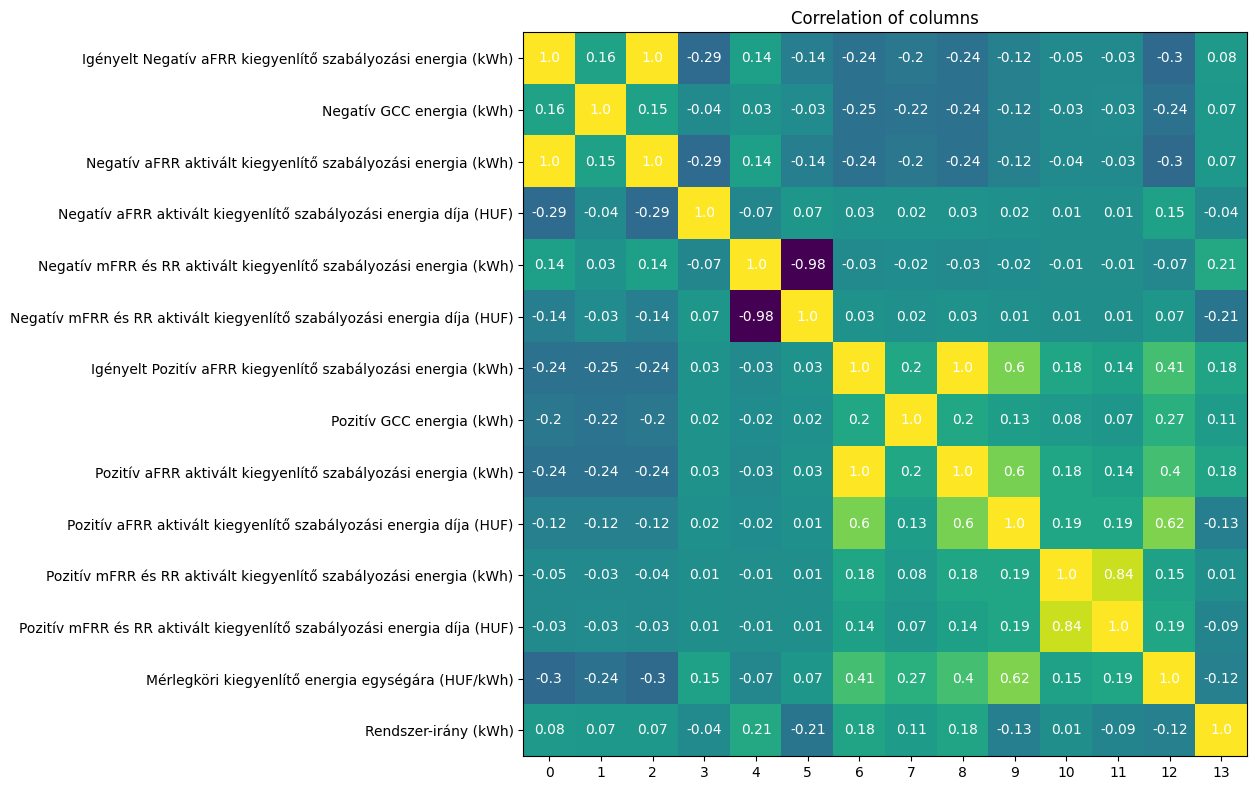

In [49]:
corr_heatmap(corrs)

In [56]:
corrs2 = df.select(
    cs.numeric().exclude(
        "Negatív mFRR és RR aktivált kiegyenlítő szabályozási energia díja (HUF)",
        "Pozitív mFRR és RR aktivált kiegyenlítő szabályozási energia díja (HUF)",
        "Pozitív aFRR aktivált kiegyenlítő szabályozási energia díja (HUF)",
        "Igényelt Negatív aFRR kiegyenlítő szabályozási energia (kWh)",
        "Igényelt Pozitív aFRR kiegyenlítő szabályozási energia (kWh)",
    )
).corr()
corrs2

Negatív GCC energia (kWh),Negatív aFRR aktivált kiegyenlítő szabályozási energia (kWh),Negatív aFRR aktivált kiegyenlítő szabályozási energia díja (HUF),Negatív mFRR és RR aktivált kiegyenlítő szabályozási energia (kWh),Pozitív GCC energia (kWh),Pozitív aFRR aktivált kiegyenlítő szabályozási energia (kWh),Pozitív mFRR és RR aktivált kiegyenlítő szabályozási energia (kWh),Mérlegköri kiegyenlítő energia egységára (HUF/kWh),Rendszer-irány (kWh)
f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,0.150931,-0.041219,0.030923,-0.224846,-0.243983,-0.034689,-0.239301,0.070636
0.150931,1.0,-0.28687,0.139355,-0.200418,-0.235352,-0.044974,-0.301773,0.072256
-0.041219,-0.28687,1.0,-0.07266,0.024732,0.029498,0.005435,0.14875,-0.043509
0.030923,0.139355,-0.07266,1.0,-0.016276,-0.032506,-0.007101,-0.069136,0.210936
-0.224846,-0.200418,0.024732,-0.016276,1.0,0.201614,0.080772,0.274939,0.108549
-0.243983,-0.235352,0.029498,-0.032506,0.201614,1.0,0.179507,0.404328,0.177243
-0.034689,-0.044974,0.005435,-0.007101,0.080772,0.179507,1.0,0.151617,0.005243
-0.239301,-0.301773,0.14875,-0.069136,0.274939,0.404328,0.151617,1.0,-0.120346
0.070636,0.072256,-0.043509,0.210936,0.108549,0.177243,0.005243,-0.120346,1.0


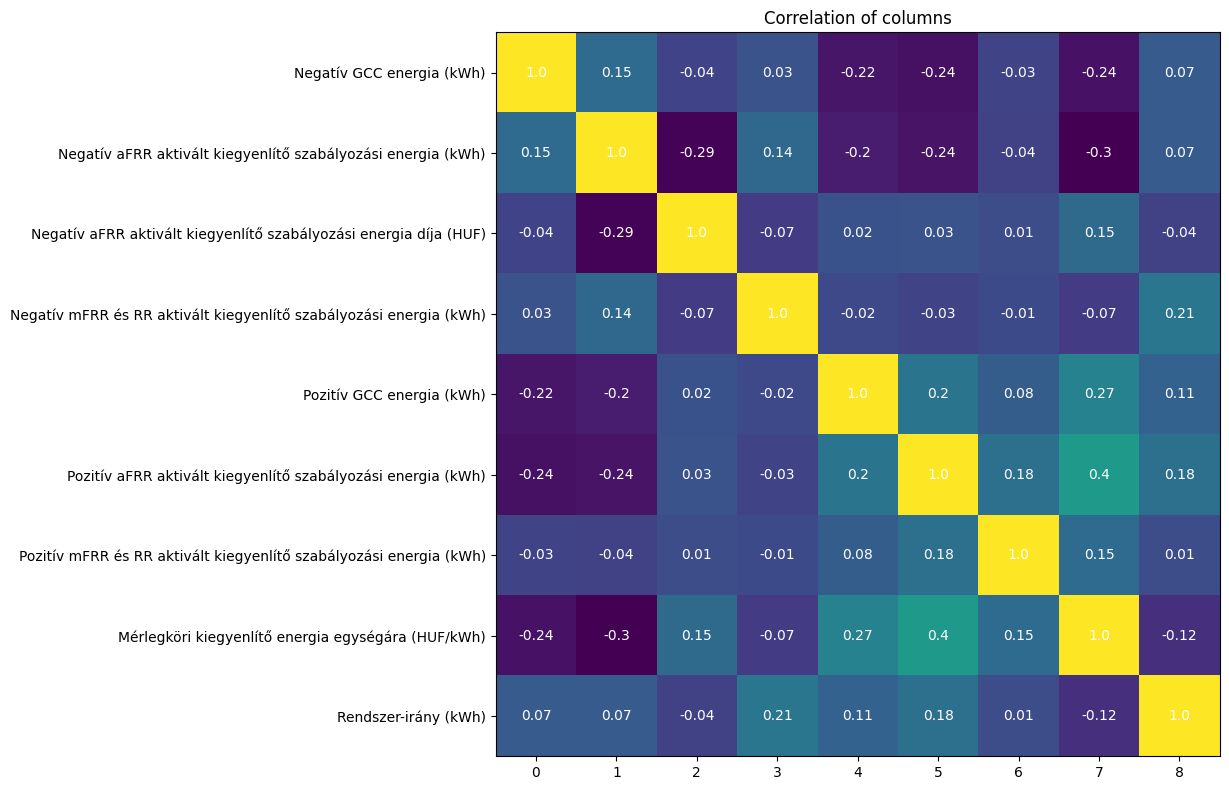

In [57]:
corr_heatmap(corrs2)